I'm sill having a hard time understanding the structure of these datasets and how events translate to clusters, so let's examine all that a bit more

In [1]:
#imports
import uproot as ur
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import vector as v

data_path = '/fast_scratch/atlas_images/v01-45/'

import atlas_mpl_style as ampl #makes matplotlib follow atlas formal style
ampl.use_atlas_style()

v.register_awkward()

In [2]:
events = ur.open(data_path+'delta_medium.root')

tree = events['EventTree']

In [3]:
branches = tree.arrays()

In [4]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
runNumber            | int32_t                  | AsDtype('>i4')
eventNumber          | int64_t                  | AsDtype('>i8')
lumiBlock            | int32_t                  | AsDtype('>i4')
coreFlags            | uint32_t                 | AsDtype('>u4')
mcEventNumber        | int32_t                  | AsDtype('>i4')
mcChannelNumber      | int32_t                  | AsDtype('>i4')
mcEventWeight        | float                    | AsDtype('>f4')
nTruthPart           | int32_t                  | AsDtype('>i4')
G4PreCalo_n_EM       | int32_t                  | AsDtype('>i4')
G4PreCalo_E_EM       | float                    | AsDtype('>f4')
G4PreCalo_n_Had      | int32_t                  | AsDtype('>i4')
G4PreCalo_E_Had      | float                    | AsDtype('>f4')
truthVertexX         | float                    | AsDtype(

In [5]:
branches.fields

['runNumber',
 'eventNumber',
 'lumiBlock',
 'coreFlags',
 'mcEventNumber',
 'mcChannelNumber',
 'mcEventWeight',
 'nTruthPart',
 'G4PreCalo_n_EM',
 'G4PreCalo_E_EM',
 'G4PreCalo_n_Had',
 'G4PreCalo_E_Had',
 'truthVertexX',
 'truthVertexY',
 'truthVertexZ',
 'truthPartPdgId',
 'truthPartStatus',
 'truthPartBarcode',
 'truthPartPt',
 'truthPartE',
 'truthPartMass',
 'truthPartEta',
 'truthPartPhi',
 'nTrack',
 'trackPt',
 'trackP',
 'trackMass',
 'trackEta',
 'trackPhi',
 'trackNumberOfPixelHits',
 'trackNumberOfSCTHits',
 'trackNumberOfPixelDeadSensors',
 'trackNumberOfSCTDeadSensors',
 'trackNumberOfPixelSharedHits',
 'trackNumberOfSCTSharedHits',
 'trackNumberOfPixelHoles',
 'trackNumberOfSCTHoles',
 'trackNumberOfInnermostPixelLayerHits',
 'trackNumberOfNextToInnermostPixelLayerHits',
 'trackExpectInnermostPixelLayerHit',
 'trackExpectNextToInnermostPixelLayerHit',
 'trackNumberOfTRTHits',
 'trackNumberOfTRTOutliers',
 'trackChiSquared',
 'trackNumberDOF',
 'trackD0',
 'trackZ0',
 '

In [6]:
#to calculate deltaR at the event level, I believe that means doing the exact same thing as before - i.e. using the
#truth values??!

truthE = branches.cluster_hitsTruthE
truthEIndex = branches.cluster_hitsTruthIndex
truthID = branches.truthPartPdgId
trutheta = branches.truthPartEta
truthphi = branches.truthPartPhi
truthpt = branches.truthPartPt
truthmass = branches.truthPartMass
clusE = branches.cluster_E
clusEta = branches.cluster_Eta
clusPhi = branches.cluster_Phi
clusPt = branches.cluster_Pt

In [7]:
len(truthE), len(clusE)

(200000, 200000)

In [8]:
len(clusPhi), len(truthphi)

(200000, 200000)

In [9]:
len(truthpt), len(clusPt) #just to convince myself these map to one another - same length so must correspond

(200000, 200000)

In [10]:
print(truthE[0], clusE[0]) #so clusE is a corrected sum of the Es of the particles in the cluster

[[1.8, 0.000907], [0.795], [0.57, 0.000973, 7.67e-05], [0.15]] [2.09, 0.799, 0.564, 0.225]


In [11]:
print(truthphi[0], clusPhi[0]) #I think this is saying truth = phi of the particles and clus = average phi of the cluster??? why is phi[0] a different shape from E[0]???

[2.89, 2.81, 3.01, 3.02, 3] [3, 2.61, 3, 2.41]


In [12]:
print(trutheta[0], clusEta[0])

[-0.526, -0.598, -0.406, -0.476, -0.377] [-0.414, -0.556, -0.513, -0.59]


In [13]:
print(truthpt[0], clusPt[0]) #at least all these shapes match but I do not get the E

[7.43, 4.49, 2.98, 0.861, 2.12] [1.93, 0.69, 0.497, 0.191]


In [14]:
len(ak.flatten(truthE)), len(ak.flatten(clusE)) #okayyyyy?

(740871, 740871)

In [15]:
len(ak.flatten(truthphi)), len(ak.flatten(clusPhi)) #why????

(751874, 740871)

In [16]:
len(ak.flatten(trutheta)), len(ak.flatten(clusEta)) #I don't like this

(751874, 740871)

In [17]:
len(ak.flatten(truthpt)), len(ak.flatten(clusPt))

(751874, 740871)

In [18]:
ak.flatten(truthphi)[0], ak.flatten(clusPhi)[0]

(2.8853957653045654, 3.0008444786071777)

In [19]:
ak.flatten(truthpt)[0], ak.flatten(clusPt)[0]

(7.428044319152832, 1.9265395402908325)

In [20]:
ak.flatten(trutheta)[0], ak.flatten(clusEta)[0]

(-0.5257676839828491, -0.41405460238456726)

In [21]:
ak.flatten(truthE)[0], ak.flatten(clusE)[0]

(<Array [1.8, 0.000907] type='2 * float64'>, 2.0940566062927246)

In [22]:
#okay well
IDflat = np.array(ak.flatten(truthID)) #this is the flat IDs
etaflat = np.array(ak.flatten(trutheta))
phiflat = np.array(ak.flatten(truthphi))
ptflat = np.array(ak.flatten(truthpt))
massflat = np.array(ak.flatten(truthmass))

In [23]:
ID2224 = []
phi2224 = []
eta2224 = []
pt2224 = []
m2224 = []

clusE2224 = []
clusEta2224 = []
clusPhi2224 = []
clusPt2224 = []

index = []

for i in range(len(truthID)):
    if (2224 in truthID[i]):
        ID2224.append(truthID[i])
        phi2224.append(truthphi[i])
        eta2224.append(trutheta[i])
        pt2224.append(truthpt[i])
        m2224.append(truthmass[i])
        clusE2224.append(clusE[i])
        clusEta2224.append(clusEta[i])
        clusPhi2224.append(clusPhi[i])
        clusPt2224.append(clusPt[i])
        
        index.append(i)

In [24]:
IDselec = []
phiselec = []
etaselec = []
ptselec = []
mselec = []
for i in range(len(ID2224)):
    
    if (211 in ID2224[i]) and (2212 in ID2224[i]):
        IDselec.append(ID2224[i])
        phiselec.append(phi2224[i])
        etaselec.append(eta2224[i])
        ptselec.append(pt2224[i])
        mselec.append(m2224[i])

In [25]:
len(ID2224), len(IDselec) #so i did NOT need the above selection then

(25000, 25000)

In [27]:
IDflat = np.array(ak.flatten(ID2224)) #this should be the same as below
etaflat = np.array(ak.flatten(eta2224))
phiflat = np.array(ak.flatten(phi2224))
ptflat = np.array(ak.flatten(pt2224))
massflat = np.array(ak.flatten(m2224))

len(IDflat), len(ID_sel_flat) #okay so same so I don't need the extra step here of selecting ps and pi+s

(77868, 77868)

In [28]:
#flatten again:
ID_sel_flat = np.array(ak.flatten(IDselec))
phi_sel_flat = np.array(ak.flatten(phiselec))
eta_sel_flat = np.array(ak.flatten(etaselec))
pt_sel_flat = np.array(ak.flatten(ptselec))
m_sel_flat = np.array(ak.flatten(mselec))

len(ID_sel_flat), len(eta_sel_flat), len(phi_sel_flat)

(77868, 77868, 77868)

In [29]:
pip_cut = ID_sel_flat == 211
prot_cut = ID_sel_flat == 2212

In [30]:
eta_pip_slice = eta_sel_flat[pip_cut]
eta_prot_slice = eta_sel_flat[prot_cut]

phi_pip_slice = phi_sel_flat[pip_cut]
phi_prot_slice = phi_sel_flat[prot_cut]

pt_pip_slice = pt_sel_flat[pip_cut]
pt_prot_slice = pt_sel_flat[prot_cut]

m_pip_slice = m_sel_flat[pip_cut]
m_prot_slice = m_sel_flat[prot_cut]

In [31]:
len(eta_pip_slice), len(eta_prot_slice), len(phi_pip_slice), len(phi_prot_slice), len(pt_pip_slice), len(pt_prot_slice), len(m_pip_slice), len(m_prot_slice)

(25000, 25000, 25000, 25000, 25000, 25000, 25000, 25000)

In [32]:
#okay phew now they're the same length..

pipcombine = ak.zip({
    "pt": pt_pip_slice,
    "eta": eta_pip_slice,
    "phi": phi_pip_slice,
    "mass": m_pip_slice,
})

protcombine = ak.zip({
    "pt": pt_prot_slice,
    "eta": eta_prot_slice,
    "phi": phi_prot_slice,
    "mass": m_prot_slice,
})

pipcombine, protcombine

(<Array [{pt: 33.2, eta: -1.56, ... mass: 0.14}] type='25000 * {"pt": float64, "e...'>,
 <Array [{pt: 128, eta: -1.5, ... mass: 0.938}] type='25000 * {"pt": float64, "et...'>)

In [33]:
pip4D = ak.with_name(pipcombine, "Momentum4D")
prot4D = ak.with_name(protcombine, "Momentum4D")

In [34]:
deltaR2 = pip4D.deltaR(prot4D)

In [35]:
np.array(deltaR2)

array([0.06260106, 0.16937822, 0.00279674, ..., 1.35330895, 0.03307543,
       1.5955876 ])

In [36]:
len(deltaR2)

25000

In [37]:
deltaR2 #so here's the next issue: I need to extend this for each item in each cluster

<Array [0.0626, 0.169, 0.0028, ... 0.0331, 1.6] type='25000 * float64'>

In [38]:
len(clusE2224)

25000

In [39]:
len(clusE2224[0]) #so repeat 22 times for first item in this list, etc

22

In [40]:
#gotta use the same thing as that longflag thing and make it work:
longflag = []
for i in range(len(clusE2224)):
    longflag.append(np.repeat(deltaR2[i], len(clusE2224[i])))

In [41]:
len(ak.Array(longflag))

25000

In [42]:
len(ak.flatten(ak.Array(longflag))) #YEP THIS IS IT!!!! THIS SHOULD WORK!!!

93827

In [43]:
delr = ak.flatten(ak.Array(longflag))

In [44]:
delr

<Array [0.0626, 0.0626, ... 0.0331, 1.6] type='93827 * float64'>

In [45]:
np.array(delr)

array([0.06260106, 0.06260106, 0.06260106, ..., 0.03307543, 0.03307543,
       1.5955876 ])

In [46]:
import convert_sets_splitdelta as cs

2021-07-20 14:51:59.198290: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [47]:
flag = np.zeros(len(truthID))

flag[index] = 2224

In [48]:
mask = flag == 2224 #so janky

In [49]:
mask

array([False, False,  True, ..., False, False,  True])

In [50]:
cs.doit(mask, 'W12_try', 211, 2212) #fimally

Working on /fast_scratch/atlas_images/v01-45/delta_medium.root
Loading data
93827 93827 93827
Normalizing


/home/kaelaekd/start_tf/LCStudies/classifier/convert_sets_splitdelta.py:73: RuntimeWarning: divide by zero encountered in log
  cell_e = np.nan_to_num(np.log(cell_e), posinf = 0, neginf=0)


Writing out
Done! W12_try


In [51]:
file = np.load('W12_try.npz')

In [54]:
file

In [55]:
X7 = file['X']
clus_eta7=file['clus_eta']
clus_pt7 = file['clus_pt']
clus_E7 = file['clus_e']
clus_et7 = file['clus_e_t']
deltar7 = file['deltaR']

print(len(X7))

82987


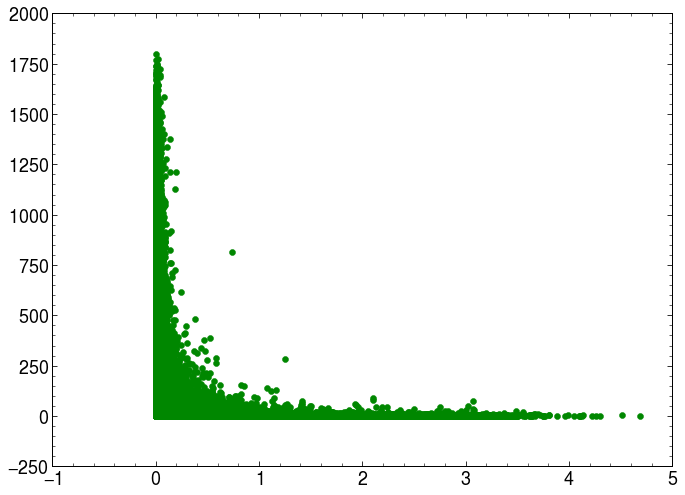

In [57]:
#not what we're asking for but just to make sure it works: 

plt.scatter(deltar7, clus_E7)

In [60]:
from energyflow.utils import data_split


In [65]:
#finally: the datatofile bit:

def doit(dat, outfile):
    X, clus_eta, clus_pt, clus_E, clus_et, deltar = dat
    X_all = np.array(X[:77000])
    eta_all = np.array(clus_eta[:77000])
    pt_all = np.array(clus_pt[:77000])
    E_all = np.array(clus_E[:77000])
    et_all = np.array(clus_et[:77000])
    deltar_all = np.array(deltar[:77000])
    
    (X_train, X_val, X_test,  
     eta_train, eta_val, eta_test, 
     ET_train, ET_val, ET_test, 
     pt_train, pt_val, pt_test, 
     Eng_train, Eng_val, Eng_test,
     deltar_train, deltar_val, deltar_test) = data_split(X_all, eta_all, et_all, pt_all, E_all, deltar_all, val=10000, test=37000)
    
    np.savez(data_path+outfile, X_train, X_val, X_test, eta_train, eta_val, eta_test, ET_train, ET_val, ET_test, pt_train, pt_val, pt_test, Eng_train, Eng_val, Eng_test, deltar_train, deltar_val, deltar_test)

In [66]:
doit((X7, clus_eta7, clus_pt7, clus_E7, clus_et7, deltar7), 'nn_delta2224_DR')

In [67]:
file2224 = np.load(data_path+'nn_delta2224_DR.npz')